In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import scipy 
import scipy.linalg  

In [5]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

### Домашнее задание 6

**1.** Решите линейную систему:  
np.matrix([[1, 2, 3],[4, 0, 6],[7, 8, 9]]) * X = np.array([12, 2, 1])

**Решение**

In [6]:
m1 = np.matrix([[1, 2, 3],[4, 0, 6],[7, 8, 9]]) 
v1 = np.array([12, 2, 1])
m1

matrix([[1, 2, 3],
        [4, 0, 6],
        [7, 8, 9]])

In [7]:
v1

array([12,  2,  1])

In [8]:
np.linalg.solve(m1, v1)

array([-9.2       ,  0.9       ,  6.46666667])

**Проверка**

In [9]:
m1.dot([-9.2       ,  0.9       ,  6.46666667])

matrix([[12.00000001,  2.00000002,  1.00000003]])

***********************************************

**2.** Найдите псевдорешение:  
  
x + 2y – z = 1  
3x – 4y = 7  
8x – 5y + 2z = 12  
2x – 5z = 7  
11x +4y – 7z = 15   

**Решение**

In [10]:
m2 = np.matrix([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
v2 = np.array([1, 7, 12, 7, 15])
m2

matrix([[ 1,  2, -1],
        [ 3, -4,  0],
        [ 8, -5,  2],
        [ 2,  0, -5],
        [11,  4, -7]])

In [11]:
v2

array([ 1,  7, 12,  7, 15])

In [12]:
np.linalg.lstsq(m2, v2)

<ipython-input-12-a7b86cd534cc>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(m2, v2)


(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

***************************************************

**3.** Сколько решений имеет линейная система:  
    np.matrix([[1, 2, 3],[4, 5, 6],[7, 8, 9]]) * X = np.array([12, 2, 1])  
    Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

**Решение**

In [13]:
m3 = np.matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
v3 = np.array([12, 2, 1])

In [14]:
m3

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [15]:
v3

array([12,  2,  1])

In [16]:
det = np.linalg.det(m3)
det

0.0

Матрица m3 имеет высокую корреляцию данных между строками.
Определитель для данной матрицы равен 0.

In [17]:
X = np.linalg.lstsq(m3, v3)

<ipython-input-17-96adc4abb062>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  X = np.linalg.lstsq(m3, v3)


In [18]:
X

(array([-7.69444444, -0.61111111,  6.47222222]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 1.47280825e-16]))

**Проверка псевдорешения**

In [19]:
m3.dot(X[0])-v3

matrix([[-1.5,  3. , -1.5]])

В текущем варианте система имеет только псевдо решения

In [20]:
m3_1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [21]:
v3_1 = np.array([12, 2, 1])

In [22]:
e1 = np.array([[1, 2, 3, 12], [4, 5, 6, 2], [7, 8, 9, 1]])
e1

array([[ 1,  2,  3, 12],
       [ 4,  5,  6,  2],
       [ 7,  8,  9,  1]])

In [23]:
np.linalg.matrix_rank(m3_1, 0.0001), np.linalg.matrix_rank(e1, 0.0001)

(2, 3)

Т.к. ранги исходной и расширенной матриц не совпадают, система не имеет решений.

Изменим правую часть, чтобы ранг расширенной матрицы совпадал с рангом исходной.

In [24]:
m3_2 = np.matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [25]:
v3_2 = np.array([8, 20, 32])

In [26]:
e2 = np.hstack((m3_2, np.split(v3_2, 3)))
e2

matrix([[ 1,  2,  3,  8],
        [ 4,  5,  6, 20],
        [ 7,  8,  9, 32]])

In [27]:
np.linalg.matrix_rank(e2, 0.0001)

2

Т.к. количество неизвестных больше ранга матрицы, система имеет решение

In [28]:
X = np.linalg.lstsq(m3_2, v3_2)

<ipython-input-28-a06385b0ede3>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  X = np.linalg.lstsq(m3_2, v3_2)


**Ответ**

In [29]:
X[0]

array([1.33333333, 1.33333333, 1.33333333])

******************************************

**4.**   
Вычислите LU-разложение матрицы:
    np.matrix([[1, 2, 3],[2, 16, 21],[4, 28, 73]]) 

**Решение**

In [30]:
A = np.matrix([[1, 2, 3],[2, 16, 21],[4, 28, 73]]) 
P, L, U = scipy.linalg.lu(A)

In [31]:
print(P)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [32]:
print(L)

[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]


In [33]:
print(U)

[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [34]:
P.dot(A)

matrix([[ 2., 16., 21.],
        [ 4., 28., 73.],
        [ 1.,  2.,  3.]])

In [35]:
L.dot(U)

array([[ 4., 28., 73.],
       [ 1.,  2.,  3.],
       [ 2., 16., 21.]])

Получившиеся матрицы эквиваленты. Отличаются только порядком строк.

In [36]:
v4=np.array([-41, 0, -3])

In [37]:
np.linalg.solve(A, v4)

array([-55.00462963,   5.98842593,   0.67592593])

******************************************************

**5.** Найдите нормальное псевдорешение недоопределенной системы:  
x + 2y – z = 1   
8x – 5y + 2z = 12  
Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.   


**Решение**

In [38]:
m5 = np.matrix([[1, 2, -1], [8, -5, 2]])
v5 = np.array([1, 12])

In [39]:
m5

matrix([[ 1,  2, -1],
        [ 8, -5,  2]])

In [40]:
v5

array([ 1, 12])

Функция Q равная норма решения

In [47]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

Построим график

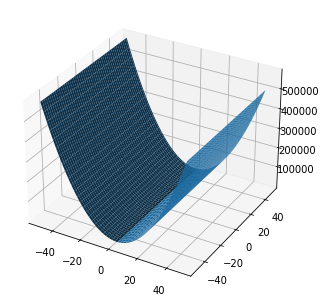

In [49]:
fig = figure()
ax = Axes3D(fig)
X = np.arange(-50, 50, 1)
Y = np.arange(-50, 50, 1)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, Q(X, 10*X - 14, 11*X - 15))
show()

**Ответ**

In [158]:
np.linalg.lstsq(m5, v5)

<ipython-input-158-3e7bf5796740>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(m5, v5)


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

---------------------------------------------

**6.**  
Найдите одно из псевдорешений вырожденной системы:
np.matrix([[1, 2, 3],[4, 5, 6],[7, 8, 9]]) * X = np.array([2, 5, 11])  
Попробуйте также отыскать и нормальное псевдорешение.

Определитель для матрицы в левой части равен нулю.

**Решение**

Используем QR разложение

m6 * X = v6

In [70]:
m6 = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])

In [71]:
v6 = np.array([2, 5, 11]) 

In [72]:
Q, R = np.linalg.qr(m6)

In [73]:
print(m6)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [74]:
print(Q)

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]


In [75]:
print(R)

[[ -8.1240384   -9.6011363  -11.07823419]
 [  0.           0.90453403   1.80906807]
 [  0.           0.           0.        ]]


In [76]:
# Проверка разложения
print(np.dot(Q, R))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [77]:
print(np.dot(np.transpose(Q), Q))

[[ 1.00000000e+00 -1.66533454e-16 -5.55111512e-17]
 [-1.66533454e-16  1.00000000e+00 -2.77555756e-16]
 [-5.55111512e-17 -2.77555756e-16  1.00000000e+00]]


In [78]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [79]:
B1 = np.dot(np.transpose(Q), v6)[:2]
print(B1)

[-1.21860576e+01  1.33226763e-15]


Решение системы с обновленной матрицей

In [80]:
X1 = np.linalg.solve(R1, B1)

In [81]:
print(X1)

[1.50000000e+00 1.47287728e-15]


In [82]:
# вектор решения
X = np.append(X1, 0)
print (X)

[1.50000000e+00 1.47287728e-15 0.00000000e+00]


In [83]:
np.linalg.norm(X)

1.499999999999999

Ошибка:

In [85]:
np.linalg.norm(np.dot(A, X) - v6)

5.408326913195943

**Нормальное псевдорешение**

In [44]:
np.linalg.lstsq(m6, v6)

<ipython-input-44-376cc412c299>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(m6, v6)


(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 1.47280825e-16]))